<a href="https://colab.research.google.com/github/ta1231/ML_Practice/blob/main/0701%EC%8B%A4%EC%8A%B5(%EC%82%AC%EC%B6%9C%EC%84%B1%ED%98%95%EA%B8%B0)_%EC%A7%80%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive

In [ ]:
label_data = pd.read_csv('./labeled_data.csv')

In [ ]:
label_data

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.59,4.47,16.920000,59.520000,7.13,653.409973,0.0,68.849998,647.98999,55.400002,30.700001,292.500000,141.800003,136.800003,37.400002,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,0.0,66.300003,0.0,0.0,24.799999,27.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.910000,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.500000,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,0.0,0.0,24.799999,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.910000,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.500000,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,0.0,0.0,24.799999,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5f8928f39c0189cc666ef25e,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.59,4.48,16.910000,59.560001,7.13,653.419983,0.0,68.839996,647.98999,55.299999,31.000000,292.500000,141.800003,136.800003,37.500000,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,0.0,0.0,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5f8928f59c0189cc666ef265,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.59,4.48,16.910000,59.560001,7.13,653.419983,0.0,68.839996,647.98999,55.299999,31.000000,292.500000,141.800003,136.800003,37.500000,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,0.0,0.0,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,5fa112859c0189cc66dabe34,2020-11-03 08:17:36,2020-11-03 오전 12:00:00,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.620001,59.560001,7.11,653.429993,0.0,68.330002,647.98999,54.900002,30.700001,29.200001,142.100006,137.000000,38.299999,59.900002,276.500000,274.899994,275.100006,269.500000,255.600006,229.600006,0.0,66.099998,0.0,0.0,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7992,5fa112869c0189cc66dabe42,2020-11-03 08:18:37,2020-11-03 오전 12:00:00,7,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.650000,59.560001,7.11,653.429993,0.0,68.349998,647.98999,55.000000,30.700001,29.200001,142.100006,136.800003,38.400002,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,0.0,66.099998,0.0,0.0,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7993,5fa112879c0189cc66dabe50,2020-11-03 08:18:37,2020-11-03 오전 12:00:00,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.650000,59.560001,7.11,653.429993,0.0,68.349998,647.98999,55.000000,30.700001,29.200001,142.

In [ ]:
label_data['EQUIP_NAME'].value_counts()

650톤-우진2호기    7992
650톤-우진          2
1800TON-우진       2
Name: EQUIP_NAME, dtype: int64

In [ ]:
label_data['PART_NAME'].value_counts()

CN7 W/S SIDE MLD'G RH        3371
CN7 W/S SIDE MLD'G LH        3365
RG3 MOLD'G W/SHLD, RH         628
RG3 MOLD'G W/SHLD, LH         628
SP2 CVR ROOF RACK CTR, RH       2
JX1 W/S SIDE MLD'G RH           2
Name: PART_NAME, dtype: int64

In [ ]:
def make_input(data, machine_name ,product_name):
    machine_ = data['EQUIP_NAME'] == machine_name
    product_ = data['PART_NAME'] == product_name
    data = data[machine_ & product_]
    
    # 불필요하다고 판단된 columns
    data.drop(['_id','TimeStamp','PART_FACT_PLAN_DATE', 'Reason',
               #'ERR_FACT_QTY',
               'PART_FACT_SERIAL','PART_NAME','EQUIP_CD', 'EQUIP_NAME',
               # mean=0인거 제거
               'Mold_Temperature_1', 'Mold_Temperature_2', 'Mold_Temperature_5', 
               'Mold_Temperature_6', 'Mold_Temperature_7', 'Mold_Temperature_8', 
               'Mold_Temperature_9', 'Mold_Temperature_10', 'Mold_Temperature_11', 
               'Mold_Temperature_12', 'Barrel_Temperature_7', 'Switch_Over_Position'], 
              axis=1, inplace=True)
    return data

In [ ]:
machine_name = "650톤-우진2호기"
product_name = ["CN7 W/S SIDE MLD'G LH", "CN7 W/S SIDE MLD'G RH", "RG3 MOLD'G W/SHLD, LH", "RG3 MOLD'G W/SHLD, RH"]

# "650톤-우진2호기'의 "CN7 W/S SIDE MLD'G LH" 데이터만 변수를 제거하여 가져옴
cn7lh = make_input(label_data, machine_name, product_name[0])
# "650톤-우진2호기'의 "CN7 W/S SIDE MLD'G RH" 데이터만 변수를 제거하여 가져옴
cn7rh = make_input(label_data, machine_name, product_name[1])
# "650톤-우진2호기'의 “RG3 MOLD’G W/SHLD, LH” 데이터만 변수를 제거하여 가져옴
rg3lh = make_input(label_data, machine_name, product_name[2])
# "650톤-우진2호기'의 “RG3 MOLD’G W/SHLD, RH” 데이터만 변수를 제거하여 가져옴
rg3rh = make_input(label_data, machine_name, product_name[3])

# 동일한 제품의 LH와 RH는 합쳐줌
cn7 = pd.concat([cn7lh, cn7rh], ignore_index=True)
rg3 = pd.concat([rg3lh, rg3rh], ignore_index=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
cn7['PassOrFail'] = cn7['PassOrFail'].replace('Y', 0).replace('N', 1)

In [ ]:
cn7.describe()

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000
mean,0.005790,9.580064,4.448425,16.820433,59.549314,7.113639,653.440859,68.381941,644.899046,55.523085,30.674674,125.583744,142.090559,136.518646,37.842132,59.347209,275.965024,275.134961,274.858091,270.285823,254.924346,229.971512,66.663094,22.074228,23.473619
std,0.075876,0.180526,0.140286,0.288946,0.372267,0.075843,0.115004,0.648307,42.170577,1.005340,0.141148,126.836972,1.985764,0.754736,1.768085,3.530820,2.302366,1.887356,1.854329,2.018081,1.134566,0.428762,2.433782,1.171389,1.370780
min,0.000000,9.360000,3.350000,16.469999,58.840000,6.070000,653.390015,59.759998,69.639999,38.500000,30.299999,29.200001,140.699997,128.399994,21.700001,13.300000,244.699997,249.000000,249.600006,244.399994,239.699997,224.600006,38.500000,19.100000,20.600000
25%,0.000000,9.530000,4.420000,16.629999,59.480000,7.120000,653.429993,68.320000,647.989990,55.099998,30.600000,29.200001,141.800003,136.300003,37.599998,59.400002,275.799988,275.000000,274.799988,269.700012,254.800003,229.800003,65.599998,21.200001,22.600000
50%,0.000000,9.570000,4.450000,16.820000,59.520000,7.120000,653.429993,68.360001,647.989990,55.400002,30.700001,29.200001,141.899994,136.500000,37.900002,59.500000,276.100006,275.299988,275.000000,270.399994,255.000000,230.000000,67.000000,21.900000,23.299999
75%,0.000000,9.600000,4.480000,16.910000,59.540001,7.120000,653.440002,68.510002,647.989990,55.900002,30.799999,292.399994,142.100006,136.800003,38.200001,59.700001,276.399994,275.500000,275.200012,271.100006,255.199997,230.100006,67.800003,22.799999,24.200001
max,1.000000,13.390000,8.270000,21.100000,64.349998,7.180000,655.000000,68.860001,647.989990,64.800003,31.200001,293.899994,169.100006,146.699997,75.199997,90.800003,277.899994,276.500000,276.000000,272.399994,256.299988,230.699997,70.599998,25.299999,27.799999


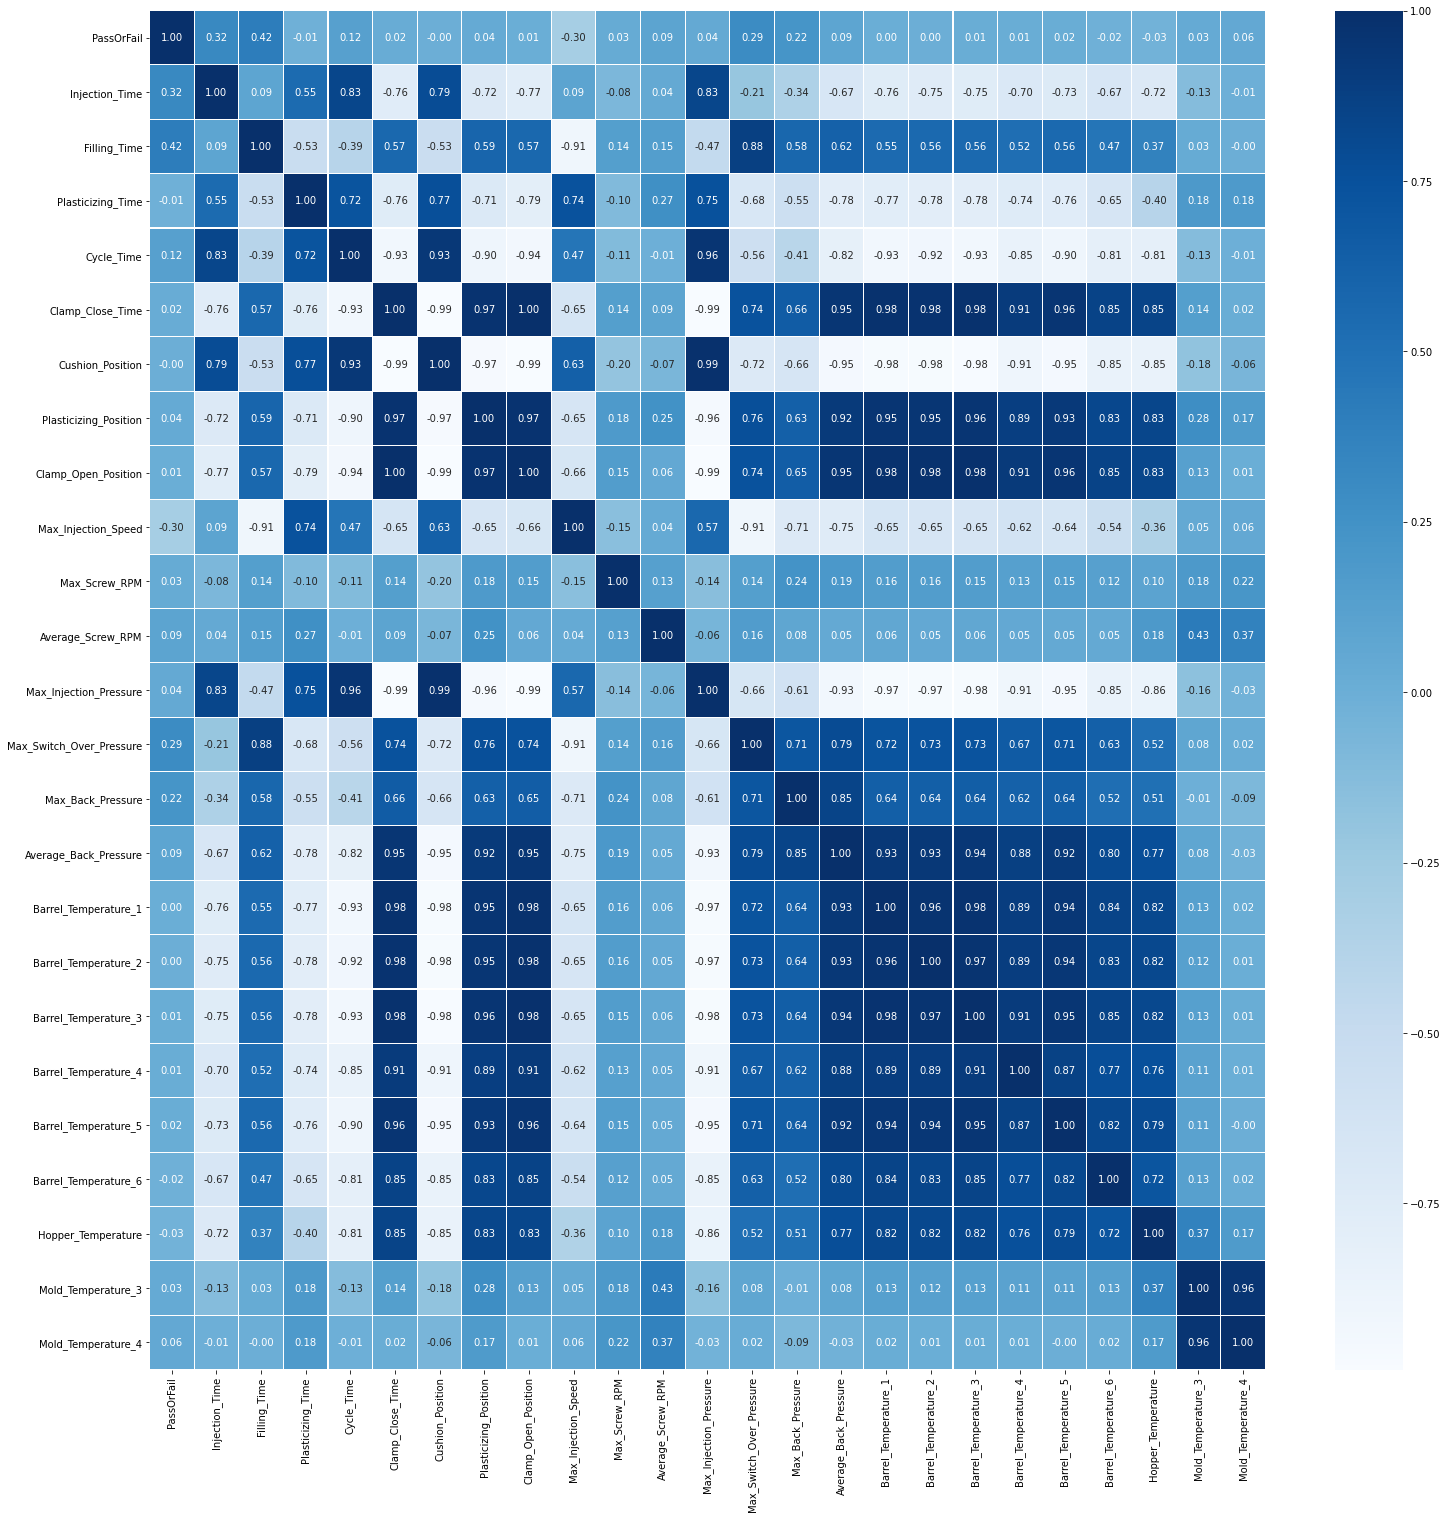

In [ ]:
plt.subplots(figsize=(25,25))
sns.heatmap(data = cn7.corr(),linewidths=0.1,annot=True, fmt = '.2f', cmap='Blues')

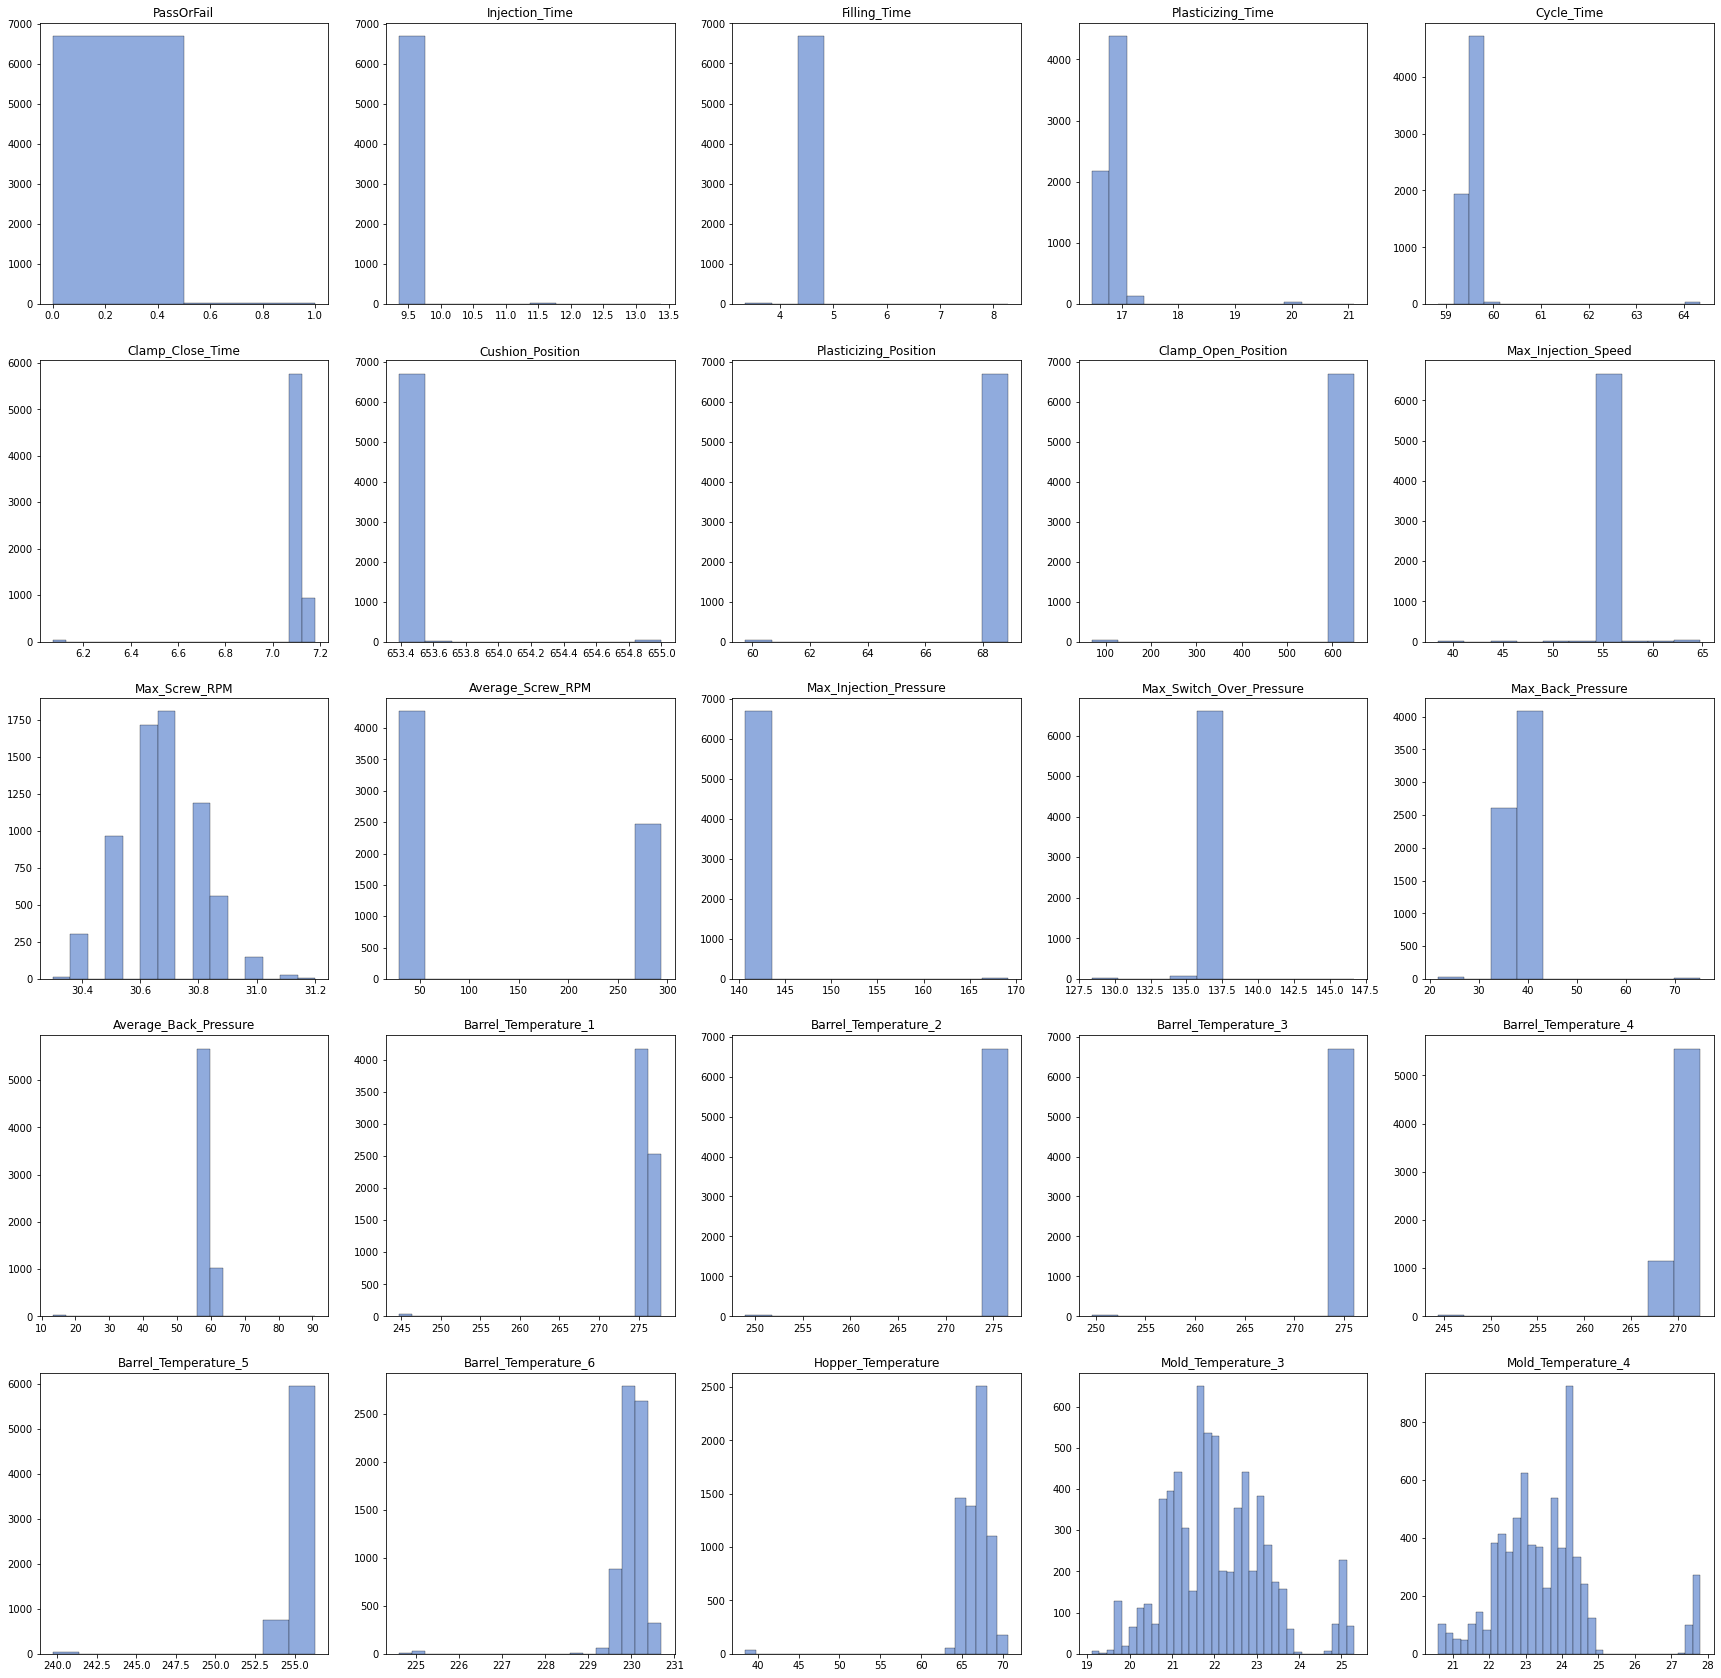

In [ ]:
plt.figure(figsize = (30,30))

# 각 변수의 막대그래프 개수 
bin = [2,10,10,15,17,20,10,10,10,10,15,10,10,10,10,20,20,10,10,10,10,20,25,35,35] 

for index, value in enumerate(cn7):
    sub = plt.subplot(5,5,index +1) 
    sub.hist(cn7[value], bins = bin[index], facecolor = (144/255,171/255,221/255), linewidth=.3, edgecolor ='black')
    plt.title(value)  #결과는 아래에서 확인 가능하다.

In [ ]:
cn7['PassOrFail'].value_counts()

0    6697
1      39
Name: PassOrFail, dtype: int64

In [ ]:
# 양품
cn7_Y = cn7[cn7['PassOrFail']==0]
print('CN7의 양품 개수:', len(cn7_Y))

# 불량
cn7_N = cn7[cn7['PassOrFail']==1]
print('CN7의 불량 개수:', len(cn7_N))

CN7의 양품 개수: 6697
CN7의 불량 개수: 39


In [ ]:
# 양품
cn7_Y.drop(['PassOrFail'] ,axis=1, inplace=True)

# 불량
cn7_N.drop(['PassOrFail'] ,axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
scaler = MinMaxScaler()

# 양품
cn7_Y = scaler.fit_transform(cn7_Y)

# 불량
cn7_N = scaler.fit_transform(cn7_N)

In [ ]:
cn7_train_Y = cn7_Y[:4000]
cn7_test_Y = cn7_Y[4000:]
cn7_test_N = cn7_N

print('CN7의 양품 학습 데이터셋 개수:', len(cn7_train_Y))
print('CN7의 양품 검증 데이터셋 개수:', len(cn7_test_Y))
print('CN7의 불량 검증 데이터셋 개수:', len(cn7_test_N))

CN7의 양품 학습 데이터셋 개수: 4000
CN7의 양품 검증 데이터셋 개수: 2697
CN7의 불량 검증 데이터셋 개수: 39


In [ ]:
dropout_encoder = Sequential([
    Dropout(0.3),
    Dense(15, activation="relu"),
    Dense(5, activation="relu")
])

dropout_decoder = Sequential([
    Dense(15, activation="relu", input_shape=[5]),
    Dense(cn7_train_Y.shape[1], activation="relu"),
])

dropout_AE = Sequential([dropout_encoder, dropout_decoder])

In [ ]:
# 손실함수 옵티마이저 정의
dropout_AE.compile(loss="mse", optimizer=Adam(lr=0.01), metrics=['accuracy'])
# 모델 훈련
history = dropout_AE.fit(cn7_train_Y, cn7_train_Y, batch_size=30, epochs=30, validation_split=0.2, callbacks=[EarlyStopping(monitor="val_loss", patience=7, mode="min")])
# 결과는 아래에서 확인 가능하다.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
107/107 [==============================] - 27s 12ms/step - loss: 0.1568 - accuracy: 0.2271 - val_loss: 0.0771 - val_accuracy: 0.2062
Epoch 2/30
107/107 [==============================] - 0s 2ms/step - loss: 0.0671 - accuracy: 0.6902 - val_loss: 0.0658 - val_accuracy: 0.2062
Epoch 3/30
107/107 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.7847 - val_loss: 0.0666 - val_accuracy: 0.7887
Epoch 4/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0615 - accuracy: 0.7788 - val_loss: 0.0633 - val_accuracy: 0.5500
Epoch 5/30
107/107 [==============================] - 0s 2ms/step - loss: 0.0607 - accuracy: 0.7537 - val_loss: 0.0631 - val_accuracy: 0.4900
Epoch 6/30
107/107 [==============================] - 0s 2ms/step - loss: 0.0604 - accuracy: 0.7992 - val_loss: 0.0641 - val_accuracy: 0.9513
Epoch 7/30
107/107 [==============================] - 0s 2ms/step - loss: 0.0604 - accuracy: 0.8195 - val_loss: 0.0622 - val_accuracy: 0.9675
Epoc

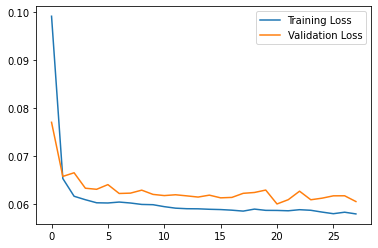

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
# plt.savefig('loss.png', dpi=300)
plt.show()

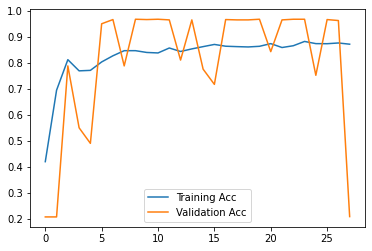

In [ ]:
plt.plot(history.history["accuracy"], label="Training Acc")
plt.plot(history.history["val_accuracy"], label="Validation Acc")
plt.legend()
plt.savefig('acc.png', dpi=300)
plt.show()

In [ ]:
# 학습 데이터의 예측값

cn7_train_pred = dropout_AE.predict(cn7_train_Y)
# 학습 데이터의 복원 오차 (예측값 – 실제 값)
cn7_train_loss = np.mean(np.square(cn7_train_pred - cn7_train_Y), axis=1)

# 임계치
threshold = np.mean(cn7_train_loss)  + 5*np.std(cn7_train_loss)

print("복원 오류 임계치: ", threshold) #결과는 아래에서 확인 가능하다.

복원 오류 임계치:  0.09837174668257391


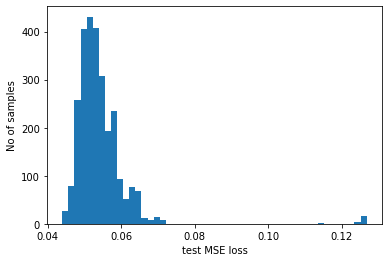

불량 개수:  22


In [ ]:
# 평가 데이터의 양품

# 예측값
cn7_predict_Y = dropout_AE.predict(cn7_test_Y)

# 양품 평가 데이터의 복원 오차 (예측값 – 실제 값)
cn7_test_Y_mse= np.mean(np.square(cn7_predict_Y - cn7_test_Y), axis=1)

# 시각화
plt.hist(cn7_test_Y_mse, bins=50)
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")
plt.show() 

# 불량으로 판단한 데이터 확인
cv7_test_Y_anomalies = cn7_test_Y_mse > threshold
print("불량 개수: ", np.sum(cv7_test_Y_anomalies)) #결과는 아래에서 확인 가능하다.

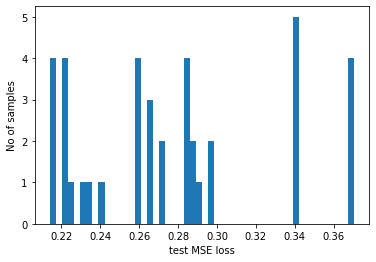

불량 개수:  39


In [ ]:
# 평가 데이터의 불량

# 예측값
cn7_predict_N = dropout_AE.predict(cn7_test_N)
# 불량 평가 데이터의 복원 오차 (예측값 – 실제 값)
cn7_test_N_mse = np.mean(np.square(cn7_predict_N - cn7_test_N), axis=1)

# 시각화
plt.hist(cn7_test_N_mse, bins=50)
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")
plt.show() 

# 불량으로 판단한 데이터 확인
cv7_test_N_anomalies = cn7_test_N_mse > threshold
print("불량 개수: ", np.sum(cv7_test_N_anomalies)) #결과는 아래에서 확인 가능하다.

In [ ]:
cn7_true = np.concatenate([np.zeros(len(cv7_test_Y_anomalies)), np.ones(len(cv7_test_N_anomalies))])

In [ ]:
cn7_prediction = np.concatenate([cv7_test_Y_anomalies, cv7_test_N_anomalies])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(cn7_true, cn7_prediction)  #결과는 아래에서 확인 가능하다.

array([[2675,   22],
       [   0,   39]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("정확도:", accuracy_score(cn7_true, cn7_prediction))
print("정밀도:", precision_score(cn7_true, cn7_prediction))
print("재현율:", recall_score(cn7_true, cn7_prediction))
print("F1:",f1_score(cn7_true, cn7_prediction)) #결과는 아래에서 확인 가능하다.

정확도: 0.9919590643274854
정밀도: 0.639344262295082
재현율: 1.0
F1: 0.78
